In [1]:
import numpy as np
import pandas as pd
import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import requests
from transformers import pipeline,set_seed,Conversation

/root/german_bloom/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-19 17:36:59.680038: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-19 17:36:59.749980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 17:37:00.624343: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find T

In [2]:
sample = pd.read_csv('./sample.csv',sep = ";", encoding='utf-8-sig')

In [6]:
pd.read_csv('./sample_with_1.csv',sep = ";", encoding='utf-8-sig').loc[1].description                                    

' Entfernt Tinte aus allen Patronenarten von Toshiba L550E / X570 E Series Modellen bis einschließlich 2014 Serie 4er Modellreihe; Für eine effektive Reinigung empfiehlt es sich auch einen Druckkopfreiniger oder Reinigungsband zur Vorbehandlung anzuwenden bevor man mit dem Reinigen beginnt! Nach jedem Wechsel eines Toners muss zuerst einmal ausreichend viel Wasser zum Drucker gegeben werden damit dieser leer gesaugt bzw gespült sein kann...“, „... Du musst diese beiden Dinge schreiben“. Weitere Angaben enthielt weder Ziffer 3 noch 2 S1). Beide Ziffern waren im Original auf weiße Kartonagen aufgedruckt worden („3“ oben rechts unten links sowie “2” nachstehend am oberen Rand); hinsichtlich Ziff\xa016 wurde als Absenderadresse zudem lediglich unter Verwendung einer'

In [7]:
pipe = pipeline("text-generation", model="malteos/bloom-6b4-clp-german")

Loading checkpoint shards: 100%|██████████| 32/32 [03:14<00:00,  6.09s/it]


In [ ]:
pipe_oa = pipeline("conversational", model="malteos/bloom-6b4-clp-german-oasst-v0.1")

Loading checkpoint shards: 100%|██████████| 2/2 [00:10<00:00,  5.37s/it]


In [5]:
len(df.ECLASS_Name.unique())

2345

In [3]:
df = pd.read_csv('./data.csv',sep = ";", encoding='utf-8-sig')
df

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke
0,2766168000,24292401,Standardkarteikarte,Karteikarte zu 20Bl. A4 SIGEL LP701,Karteikarte zu 20 Stck A4 SIGEL LP701,"160 Karten A7 blanko weiá,zum Selbergestalten ...",PC- Karten weiá zum beidseitigen Bedrucken mit...,LP701,SIGEL GMBH,SIGEL
1,1000255650,24360202,Konferenzmappe,Schreibmappe A4 blau LEITZ 4580-00-37 Bebop,Schreibmappe A4 blau Bebop LEITZ 4580-00-37,"m. Schreibblock u. Ablagef„chern, 4 Sichthlle...","Leitz Schreibmappe Bebop, mit liniertem Schrei...",4580-00-37,Esselte Office Products GmbH,LEITZ
2,1000228410,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone T5961 foto sw EPSON C13T596100 3...,Inkjetpatrone T5961 foto schwarz 350ml EPSON...,"Inhalt: 350 ml, Epson Ink Stylus Pro 7900/9900...",NaN,C13T596100,UFP Austria GmbH,EPSON
3,2015997000,24261301,Plotter-Standardpapier,"Plotterpapier 610mmx45,7m weiá HP P C6035A 90g...","Plotterpapier 610mmx45,7m weiá 90g 24"" HP P ...",HP Inkjet-Papier hochweiá sorgt fr profession...,NaN,C6035A,UFP Austria GmbH,HP P
4,1000167800,24292201,Heftstreifen,Heftstreifen weiá ESSELTE 1430618 kurz,Heftstreifen weiá kurz ESSELTE 1430618,"PP Folie,mit Standardlochung 8cm und Sonderloc...",Esselte Einh„ngeheftstreifen kurz. Mit Lochung...,1430618,LEITZ ACCO BRANDS GMBH & CO. KG,ESSELTE
...,...,...,...,...,...,...,...,...,...,...
231625,5300004519,24301609,Prospekthalter,,,,NaN,NaN,deflecto?,NaN
231626,5300015645,24260304,Kanzlei-Papier,,,,NaN,NaN,Blasetti,NaN
231627,5300014059,24310711,Sicherheitsschrank (Broeinrichtung),,,,NaN,NaN,Security Italia,NaN
231628,5400010173,24291301,Aktendeckel,,,,NaN,NaN,NaN,NaN


In [4]:
df_classes = pd.read_csv('./used_classes.csv',sep = ";", encoding='utf-8-sig').set_index("class_id")
df_classes = df_classes.drop(columns = ['Unnamed: 0'])
df_classes

,class,class_new
class_id,,
16030290,"Süßigkeit, Schokolade (nicht spezifiziert)","Candiness, chocolate"
16030390,Süßmittel (nicht spezifiziert),sweetener
16070290,"Milch, Milchprodukt (nicht spezifiziert)","Milk, milk product"
16120190,Alkoholfreies Getränk (nicht spezifiziert),Non-alcoholic drink
16129090,"Getränk (Sonstige, nicht spezifiziert)",drink
...,...,...
41070304,Blechschild (Marketing),Tin sign
41080404,"Staffelei (Präsenter, Holz, Marketing)",easel
41090390,"Werbedrucksache Plakat, Affiche (Marketing, ni...","Promotion of poster, affiche"


In [3]:
sample = df[:1000].sample(n=100,random_state=1)
sample

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke
507,2030939000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Resttonerbeh„lter TOSHIBA TB320,Resttonerbeh„lter TOSHIBA TB320,"passend fr Toshiba 1210, BD2810- Tonerbag TB-...",NaN,TB320,NaN,TOSHIBA
818,2603884000,24290505,H„ngeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ
452,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,FABER CASTELL
368,2014420000,19140611,Farbband (Drucker),Farbbandkassette Gr. 634 sw EPSON C13S015020 N...,Farbbandkassette Gr. 634 schwarz Nylon EPSON...,passend fr Epson MX100/105/1000/1050/1170/118...,NaN,C13S015020,Rauch Gerhard,EPSON
242,2766314000,24260901,"Brief-, Falt-, Visitenkarte unbedruckt",Visitenkarten 400ST weiá SIGEL LP796 225g A4,Visitenkarten 400ST weiá 225g A4 SIGEL LP796,"Mit den PC-Visitenkarten in 3C-Technologie, gl...","PC-Visitenkarten hochweiá, satiniert, mit eine...",LP796,SIGEL GMBH,SIGEL
...,...,...,...,...,...,...,...,...,...,...
671,2029079000,24300905,Magnetschild,Magnetstreifen C-Profile 10ST braun FRANKEN C1...,Magnetstreifen C-Profile 10 Stck braun 75x2...,Fenstermagnete geeignet fr Lagerbeschilderung...,Magnetschild. Beschriftungsschild auswechselba...,C163,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
559,2030022000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Entwicklereinheit schwarz XEROX 005R90217,Entwicklereinheit schwarz XEROX 005R90217,passend fr Xerox 5750- Developer black 5R9021...,NaN,005R90217,NaN,XEROX
593,2029277010,24300902,Magnet (Pr„sentation),Magnet 10ST grau FRANKEN HM10 12 D13 mm,Magnet 10 Stck grau D13 mm FRANKEN HM10 12,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,HM10 12,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
258,1000213470,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Druckertyp: Canon Pixma MX 7600\nBezeichnung: ...,NaN,2444B001,UFP Austria GmbH,CANON


In [4]:
sample = pd.concat([df[:2000].sample(n=1),sample])
sample = sample.drop([494])
sample

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke
455,2305180010,24290403,Ordner-Rckenschild,Rckenschild 75ST grau LEITZ 6098-00-85,Rckenschild grau LEITZ 6098-00-85,"Leitz Rckenschild, selbstklebend, breit, PC-b...","Leitz Rckenschild, selbstklebend, breit, PC-b...",6098-00-85,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ
507,2030939000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Resttonerbeh„lter TOSHIBA TB320,Resttonerbeh„lter TOSHIBA TB320,"passend fr Toshiba 1210, BD2810- Tonerbag TB-...",NaN,TB320,NaN,TOSHIBA
818,2603884000,24290505,H„ngeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ
452,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,FABER CASTELL
368,2014420000,19140611,Farbband (Drucker),Farbbandkassette Gr. 634 sw EPSON C13S015020 N...,Farbbandkassette Gr. 634 schwarz Nylon EPSON...,passend fr Epson MX100/105/1000/1050/1170/118...,NaN,C13S015020,Rauch Gerhard,EPSON
...,...,...,...,...,...,...,...,...,...,...
671,2029079000,24300905,Magnetschild,Magnetstreifen C-Profile 10ST braun FRANKEN C1...,Magnetstreifen C-Profile 10 Stck braun 75x2...,Fenstermagnete geeignet fr Lagerbeschilderung...,Magnetschild. Beschriftungsschild auswechselba...,C163,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
559,2030022000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Entwicklereinheit schwarz XEROX 005R90217,Entwicklereinheit schwarz XEROX 005R90217,passend fr Xerox 5750- Developer black 5R9021...,NaN,005R90217,NaN,XEROX
593,2029277010,24300902,Magnet (Pr„sentation),Magnet 10ST grau FRANKEN HM10 12 D13 mm,Magnet 10 Stck grau D13 mm FRANKEN HM10 12,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,HM10 12,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN
258,1000213470,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Druckertyp: Canon Pixma MX 7600\nBezeichnung: ...,NaN,2444B001,UFP Austria GmbH,CANON


<Axes: xlabel='ECLASS_Name'>

/root/german_bloom/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/root/german_bloom/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


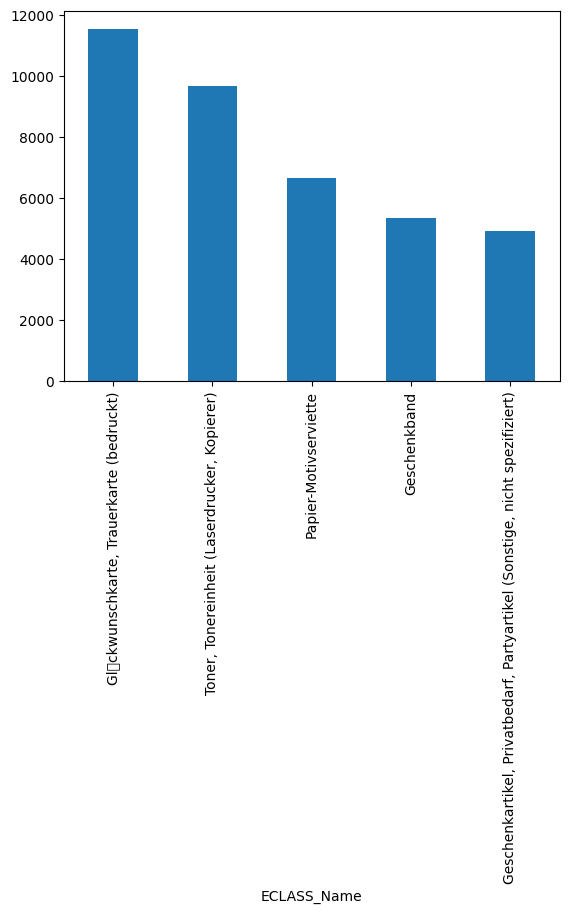

In [4]:
df["ECLASS_Name"].value_counts()[:5].plot(kind='bar')

In [7]:
product = df.iloc[10]    
product                            

Konzernartikelnummer                                                                 2030904000
ECLASS_8_1                                                                             19140601
ECLASS_Name                                        Toner, Tonereinheit (Laserdrucker, Kopierer)
Bezeichnung                                   Lasertoner 7ST sort. magenta XEROX-TEKTRONIX 1...
Webbezeichnung                                Lasertoner 7 Stck sortiert magenta XEROX-TEKT...
Detailinformation ( the one online)           passend fr Xerox-Tektronix Phaser 340/350/360...
LieferantenDetailinformation (the company)                                                  NaN
OEMNummer                                                                              16176000
Hersteller                                                                        Rauch Gerhard
Marke                                                                           XEROX-TEKTRONIX
Name: 10, dtype: object

In [15]:
product["Detailinformation ( the one online)"]

'passend f\x81r Xerox-Tektronix Phaser 340/350/360- 5 x ColorStix magenta + 2 x black (schwarz)- Toner Set 016176000x- ACHTUNG! Bitte Lieferzeit von 2-4 Wochen beachten, da dieser Artikel von Rauch selbst besorgt werden muá!'

# text generation -  with category description

In [16]:
# related
shot1 = """Produktname: Brother Multipack TN243CMYK Toner 3,\n
        Produktkategorie: Toner, Tonereinheit (Laserdrucker, Kopierer),\n
        Katagoriebeschreibung: Toner ist eine Pulvermischung, die in Laserdruckern und Fotokopierern verwendet wird, um den gedruckten Text und die Bilder auf dem Papier zu erzeugen, im Allgemeinen durch eine Tonerkartusche. Meistens granulierter Kunststoff, frühe Mischungen fügten nur Kohlenstoffpulver und Eisenoxid hinzu, inzwischen wurden jedoch Mischungen entwickelt, die Polypropylen, pyrogene Kieselsäure und verschiedene Mineralien für die Triboelektrifizierung enthielten. Als Alternative zu Erdölkunststoffen gibt es auch Toner, die aus pflanzlichem Kunststoff bestehen. Durch die Hitze der Fixiereinheit werden Tonerpartikel geschmolzen und so mit dem Papier verbunden.,\n
        Produktbeschreibung :Das Original Brother TN-243CMYK Value Pack beinhaltet jeweils eine Tonerkartusche in Schwarz, Cyan, Gelb und Magenta. Die Tonerkartuschen und die Brother Drucker wurden aufeinander so abgestimmt, dass beste Ergebnisse in brillanten Farben erzielt werden. Die Kartuschen sind leicht zu installieren. Profitieren Sie von langlebigen und hochwertigen Ausdrucken.Brother berücksichtigt die Auswirkungen auf die Umwelt in jeder Phase des Lebenszyklus Ihrer Tonerkartusche und reduziert den Abfall bei der Entsorgung. Unsere gesamte Hardware und alle unsere Tonerkartuschen sind so gebaut, dass sie die Umwelt so wenig wie möglich belasten.
"""
shot2 = """Produktname: MyCatridge 207X W2210X Toner ( Ohne Chip ) Kompatibel für HP Color Laserjet Pro MFP M283FDW M255DW M282NW Toner für HP 207A W2210A,\n
        Produktkategorie: Toner, Tonereinheit (Laserdrucker, Kopierer),\n
        Katagoriebeschreibung: Toner ist eine Pulvermischung, die in Laserdruckern und Fotokopierern verwendet wird, um den gedruckten Text und die Bilder auf dem Papier zu erzeugen, im Allgemeinen durch eine Tonerkartusche. Meistens granulierter Kunststoff, frühe Mischungen fügten nur Kohlenstoffpulver und Eisenoxid hinzu, inzwischen wurden jedoch Mischungen entwickelt, die Polypropylen, pyrogene Kieselsäure und verschiedene Mineralien für die Triboelektrifizierung enthielten. Als Alternative zu Erdölkunststoffen gibt es auch Toner, die aus pflanzlichem Kunststoff bestehen. Durch die Hitze der Fixiereinheit werden Tonerpartikel geschmolzen und so mit dem Papier verbunden.,\n
        Produktbeschreibung :[Packungsinhalt] MYCARTRIDGE 207X W2210X toner ( Ohne Chip ) W2210X / W2211X / W2212X / W2213X Patronen (Nicht Original)[Kompatible Drucker] HP 207X W2210X Kompatibel für HP Color Laserjet Pro MFP M283fdw M283fdn M282nw M255dw M255nw [Seitenleistung] HP 207X W2210X 3150 Seiten pro Schwarz Toner, 2450 Seiten pro Farbe Toner bei 5% Abdeckunge von A4. (Schwarz/Cyan/Magenta/Gelb) [Exzellente Qualität] Mit Premium-Materialien, fortschrittlicher automatischer Produktion, Qualitätskontrollmaßnahmen und strengen Produkttests bietet myCartridge eine stabilere Druckleistung und eine längere Drucklebensdauer. Keine Schäden für Ihren Drucker [Kundendienst] Egal auf welches Problem Sie stoßen, zögern Sie nicht, uns zu kontaktieren. Wir werden Ihre E-Mail innerhalb von 24-Stunden beantworten.
"""


In [9]:
# unrelated
shot1 = """Produktname: HP DeskJet 3750 Multifunktionsdrucker,\n
        Produktkategorie: drucker,\n
        Katagoriebeschreibung: Ein Drucker ist ein Peripheriegerät, das dauerhaft arbeitet Darstellung von Grafiken oder Texten, meist auf Papier. während die meisten Ausgaben sind ür Menschen lesbare Barcode-Drucker sind ein Beispiel für eine erweiterte Verwendung von Druckern.,\n
        Produktbeschreibung :Der HP DeskJet 3750 ist ein kompakter und leistungsstarker All-in-One-Drucker, der Ihnen das Drucken, Scannen und Kopieren erleichtert. Dank der HP Thermal Inkjet-Technologie und der HP 304-Tintenpatronen können Sie mit diesem Drucker in hoher Qualität und Geschwindigkeit drucken. Der Drucker ist einfach zu installieren und intuitiv zu bedienen, und Sie können auch von Ihrem Smartphone oder Tablet aus drucken, indem Sie die HP Smart App nutzen. Der DeskJet 3750 ist nicht nur praktisch, sondern auch günstig. Wenn Sie sich für ein HP Instant Ink-Abonnement entscheiden, erhalten Sie bis zu vier Monate lang kostenlosen Tintennachschub frei Haus. Außerdem sparen Sie Energie und Platz, da der Drucker der weltweit kleinste All-in-One-Drucker ist. Der Drucker hat eine Energieeffizienzklasse A+ und einen jährlichen Stromverbrauch von nur 0,06 kWh. Wenn Sie einen schnellen und einfachen Drucker für Ihren Heim- oder Kleinbürobedarf suchen, dann ist der HP DeskJet 3750 die ideale Wahl für Sie!
"""
shot2= """Produktname: HP Smart Tank 5105 All-in-One-Drucker,\n
        Produktkategorie: drucker,\n
        Katagoriebeschreibung: Ein Drucker ist ein Peripheriegerät, das dauerhaft arbeitet Darstellung von Grafiken oder Texten, meist auf Papier. während die meisten Ausgaben sind ür Menschen lesbare Barcode-Drucker sind ein Beispiel für eine erweiterte Verwendung von Druckern.,\n
        Produktbeschreibung :Drucken Sie mit beeindruckender Präzision und Geschwindigkeit - erleben Sie den HP 5105 Drucker! Der HP 5105 ist der ultimative Drucker für professionelle Ansprüche. Egal, ob Sie im Büro arbeiten oder von zu Hause aus tätig sind, dieser Drucker liefert erstklassige Ergebnisse in kürzester Zeit.Und Sie schützen die Umwelt mit den nachfüllbaren Tintnetanks!

"""

In [13]:


messages ={"zero shot" :f"""
        Schreib nun die Produktbeschreibung für dieses Produkt.
        Produktname: {product.Webbezeichnung},\n
        Produktkategorie: {product.ECLASS_Name},\n
        Katagoriebeschreibung: Toner ist eine Pulvermischung, die in Laserdruckern und Fotokopierern verwendet wird, um den gedruckten Text und die Bilder auf dem Papier zu erzeugen, im Allgemeinen durch eine Tonerkartusche. Meistens granulierter Kunststoff, frühe Mischungen fügten nur Kohlenstoffpulver und Eisenoxid hinzu, inzwischen wurden jedoch Mischungen entwickelt, die Polypropylen, pyrogene Kieselsäure und verschiedene Mineralien für die Triboelektrifizierung enthielten. Als Alternative zu Erdölkunststoffen gibt es auch Toner, die aus pflanzlichem Kunststoff bestehen. Durch die Hitze der Fixiereinheit werden Tonerpartikel geschmolzen und so mit dem Papier verbunden.,\n
        Produktbeschreibung:"""
        ,"One shot" : f"""
        Schreib die Produktbeschreibung für das folgende Produkt. Hier ist ein Beispiel:
        {shot1} \n
        Schreib nun die Produktbeschreibung für dieses Produkt.
        Produktname: {product.Webbezeichnung},\n
        Produktkategorie: {product.ECLASS_Name},\n
        Katagoriebeschreibung: Toner ist eine Pulvermischung, die in Laserdruckern und Fotokopierern verwendet wird, um den gedruckten Text und die Bilder auf dem Papier zu erzeugen, im Allgemeinen durch eine Tonerkartusche. Meistens granulierter Kunststoff, frühe Mischungen fügten nur Kohlenstoffpulver und Eisenoxid hinzu, inzwischen wurden jedoch Mischungen entwickelt, die Polypropylen, pyrogene Kieselsäure und verschiedene Mineralien für die Triboelektrifizierung enthielten. Als Alternative zu Erdölkunststoffen gibt es auch Toner, die aus pflanzlichem Kunststoff bestehen. Durch die Hitze der Fixiereinheit werden Tonerpartikel geschmolzen und so mit dem Papier verbunden.,\n
        Produktbeschreibung:"""

        ,"two shot": f"""
        Schreib die Produktbeschreibung für das folgende Produkt. Hier ist zwei Beispiele:
        {shot1} \n
        {shot2} \n
        Schreib nun die Produktbeschreibung für dieses Produkt.
        Produktname: {product.Webbezeichnung},\n
        Produktkategorie: {product.ECLASS_Name},\n
        Katagoriebeschreibung: Toner ist eine Pulvermischung, die in Laserdruckern und Fotokopierern verwendet wird, um den gedruckten Text und die Bilder auf dem Papier zu erzeugen, im Allgemeinen durch eine Tonerkartusche. Meistens granulierter Kunststoff, frühe Mischungen fügten nur Kohlenstoffpulver und Eisenoxid hinzu, inzwischen wurden jedoch Mischungen entwickelt, die Polypropylen, pyrogene Kieselsäure und verschiedene Mineralien für die Triboelektrifizierung enthielten. Als Alternative zu Erdölkunststoffen gibt es auch Toner, die aus pflanzlichem Kunststoff bestehen. Durch die Hitze der Fixiereinheit werden Tonerpartikel geschmolzen und so mit dem Papier verbunden.,\n
        Produktbeschreibung:"""}


In [24]:
message = messages["zero shot"]
l = len(message)
print(l)
output = pipe(message,max_length= l,num_return_sequences= 1, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


950


In [18]:
outputs = {}
for key,message in messages.items():
    l = len(message)
    output = pipe(message,max_length= l + 100,num_return_sequences= 1, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
    outputs[key+" related with"] = output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]
    print(output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):])
outputs

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 Die Tintenpatrone sorgt dafür - bei jedem Ausdruck -, dass das Bild Ihres digitalen Fotos perfekt zur Geltung kommt.; Der Fotoausdruck erreicht leuchtet strahlend hell wie ein Originalfoto von Ihrem hochwertigen Farbdrucker oder Multifunktionsgerät; Sie können Ihre Aufnahmen problemlos teilen sowie drucken/kopieren./Einfache Handhabung ohne Spezialkenntnisse.: Schließen sie einfach Ihren Drucker an einen Laptop / PC über USB 2.-0 (Typ B)-Port* bzw.* Kabel am Computer and dann schließen ihre Patronne a einem Stromquelle.(Bei Verwendung eines Faxgeräts kann diese Funktion nicht genutzt werde.).(Kabel enthalten). Diese praktische Patronen lässt sich sehr leicht austauschen &nbsp;- kein Kleckern mehr! Mit einer Kapazität bis 5000 Seiten macht Ihnen selbst häufiges Drucken noch lange keine Sorgen....Für alle Laserausdrucke geeignet..Die Farbe Ihrer Dokumente bleibt stets gestochen scharf...Drucken nach Bedarf!. Lieferumfang:. 4 farbige Fototrommeln à 500 Blatt + 1 schwarze Trommeleinheit (

KeyboardInterrupt: 

In [17]:
l = 300
output = pipe(messages["zero shot"],min_length=l + 100,max_length= l + 300,num_return_sequences= 3, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


' Das M1 Multifunktionspapier A4 80 g/m² Laser 875 x 600mm (10 Blätter), 250 Bl./Packung ermöglicht ein hochwertiges Druckergebnis bei allen gängigen Druckertypen von Farblaserdruck bis sLBCT..retter Druckqualität sind hochweiße Seitenränder an Dokumenten... Für das einfache Arbeiten am PC oder Mac hat sich als Standardformat DINA3 durchgesetzt – entsprechend bietet unsere Produktpalette natürlich hochwertige Produkte zum Drucken dieser Formate sowie weitere praktische Zusatzprodukte wie Briefumschläge uvam...,, \x80?,. - 20% Rabatt gültig vom 1.-31 10 2016! Bitte beachten Sie folgende Bedingungen zur Einlösung des Gutscheins:: Der Mindestbestellwert beträgt 99 €, nicht kombinierbar... Die Aktion gilt pro Kunde einmalig zwischen 01 06 12 00 Uhr online www.... Weitere Informationen finden sie unter http://wwwbophlebitiscarnaticuivreauchelabourdetherapiedictatediariesmedicaltechnologyproductsindiaonlineshopcombiclothinghandmadeautogenesisfascionclothesbuybeautyblackcatbabycarewhitescienc

In [15]:

for key,message in messages.items():
    l = len(message)
    output = pipe(message,min_length=l + 100,max_length= l + 300,num_return_sequences= 3, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
    outputs[key+" unrelated with"] = output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [1]:
outputs

NameError: name 'outputs' is not defined

# text generation -  without category description

In [ ]:
# related
shot1 = """Produktname: Brother Multipack TN243CMYK Toner 3,\n
        Produktkategorie: Toner, Tonereinheit (Laserdrucker, Kopierer),\n
        Produktbeschreibung :Das Original Brother TN-243CMYK Value Pack beinhaltet jeweils eine Tonerkartusche in Schwarz, Cyan, Gelb und Magenta. Die Tonerkartuschen und die Brother Drucker wurden aufeinander so abgestimmt, dass beste Ergebnisse in brillanten Farben erzielt werden. Die Kartuschen sind leicht zu installieren. Profitieren Sie von langlebigen und hochwertigen Ausdrucken.Brother berücksichtigt die Auswirkungen auf die Umwelt in jeder Phase des Lebenszyklus Ihrer Tonerkartusche und reduziert den Abfall bei der Entsorgung. Unsere gesamte Hardware und alle unsere Tonerkartuschen sind so gebaut, dass sie die Umwelt so wenig wie möglich belasten.
"""
shot2 = """Produktname: MyCatridge 207X W2210X Toner ( Ohne Chip ) Kompatibel für HP Color Laserjet Pro MFP M283FDW M255DW M282NW Toner für HP 207A W2210A,\n
        Produktkategorie: Toner, Tonereinheit (Laserdrucker, Kopierer),\n
        Produktbeschreibung :[Packungsinhalt] MYCARTRIDGE 207X W2210X toner ( Ohne Chip ) W2210X / W2211X / W2212X / W2213X Patronen (Nicht Original)[Kompatible Drucker] HP 207X W2210X Kompatibel für HP Color Laserjet Pro MFP M283fdw M283fdn M282nw M255dw M255nw [Seitenleistung] HP 207X W2210X 3150 Seiten pro Schwarz Toner, 2450 Seiten pro Farbe Toner bei 5% Abdeckunge von A4. (Schwarz/Cyan/Magenta/Gelb) [Exzellente Qualität] Mit Premium-Materialien, fortschrittlicher automatischer Produktion, Qualitätskontrollmaßnahmen und strengen Produkttests bietet myCartridge eine stabilere Druckleistung und eine längere Drucklebensdauer. Keine Schäden für Ihren Drucker [Kundendienst] Egal auf welches Problem Sie stoßen, zögern Sie nicht, uns zu kontaktieren. Wir werden Ihre E-Mail innerhalb von 24-Stunden beantworten.
"""


In [ ]:
# unrelated
shot1 = """Produktname: HP DeskJet 3750 Multifunktionsdrucker,\n
        Produktkategorie: drucker,\n
        Produktbeschreibung :Der HP DeskJet 3750 ist ein kompakter und leistungsstarker All-in-One-Drucker, der Ihnen das Drucken, Scannen und Kopieren erleichtert. Dank der HP Thermal Inkjet-Technologie und der HP 304-Tintenpatronen können Sie mit diesem Drucker in hoher Qualität und Geschwindigkeit drucken. Der Drucker ist einfach zu installieren und intuitiv zu bedienen, und Sie können auch von Ihrem Smartphone oder Tablet aus drucken, indem Sie die HP Smart App nutzen. Der DeskJet 3750 ist nicht nur praktisch, sondern auch günstig. Wenn Sie sich für ein HP Instant Ink-Abonnement entscheiden, erhalten Sie bis zu vier Monate lang kostenlosen Tintennachschub frei Haus. Außerdem sparen Sie Energie und Platz, da der Drucker der weltweit kleinste All-in-One-Drucker ist. Der Drucker hat eine Energieeffizienzklasse A+ und einen jährlichen Stromverbrauch von nur 0,06 kWh. Wenn Sie einen schnellen und einfachen Drucker für Ihren Heim- oder Kleinbürobedarf suchen, dann ist der HP DeskJet 3750 die ideale Wahl für Sie!
"""
shot2= """Produktname: HP Smart Tank 5105 All-in-One-Drucker,\n
        Produktkategorie: drucker,\n
        Produktbeschreibung :Drucken Sie mit beeindruckender Präzision und Geschwindigkeit - erleben Sie den HP 5105 Drucker! Der HP 5105 ist der ultimative Drucker für professionelle Ansprüche. Egal, ob Sie im Büro arbeiten oder von zu Hause aus tätig sind, dieser Drucker liefert erstklassige Ergebnisse in kürzester Zeit.Und Sie schützen die Umwelt mit den nachfüllbaren Tintnetanks!

"""

In [ ]:


messages ={"zero shot" :f"""
        Schreib nun die Produktbeschreibung für dieses Produkt.
        Produktname: {product.Webbezeichnung},\n
        Produktkategorie: {product.Webbezeichnung},\n
        Produktbeschreibung:"""
        ,"One shot" : f"""
        Schreib die Produktbeschreibung für das folgende Produkt. Hier ist ein Beispiel:
        {shot1} \n
        Schreib nun die Produktbeschreibung für dieses Produkt.
        Produktname: {product.Webbezeichnung},\n
        Produktkategorie: {product.Webbezeichnung},\n
        Produktbeschreibung:"""

        ,"two shot": f"""
        Schreib die Produktbeschreibung für das folgende Produkt. Hier ist zwei Beispiele:
        {shot1} \n
        {shot2} \n
        Schreib nun die Produktbeschreibung für dieses Produkt.
        Produktname: {product.Webbezeichnung},\n
        Produktkategorie: {product.Webbezeichnung},\n
        Produktbeschreibung:"""}


In [ ]:

for key,message in messages.items():
    l = len(message)
    output = pipe(message,min_length=l + 100,max_length= l + 300,num_return_sequences= 3, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
    outputs[key+" related without"] = output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]


In [ ]:

for key,message in messages.items():
    l = len(message)
    output = pipe(message,min_length=l + 100,max_length= l + 300,num_return_sequences= 3, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
    outputs[key+" unrelated without"] = output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]


# scoring

In [14]:
import readability
import syntok.segmenter as segmenter

In [2]:
output

{'zero shot related with': ' Dieses Angebot beinhaltet insgesamt sieben Kartuschen des Typs Magentatonergranulat von Tektronix® Originalware (Original Product) als Ersatztrommel an Ihrem Drucker oder Kopierer Ihres Computersystems unter Verwendung eines kompatiblen TINY DOME Trommelkopfes.. Die Herstellergarantie beträgt 2 Jahre ab Rechnungsdatum bei privater Nutzung./Bei gewerblicher/geschäftlich genutzter Ware gilt gemäߠ§ 477 BGB verlängerte Garantie über das Kaufrecht hinaus.-Tectronics Corporation USA bietet Ihnen hier diese Originalkontakte vom Typ TECHNOLOGIC TRACKS K5904LM2G1C31180B15VF6EWU0IREP0012SN8707H10R1000136TDI051904000014403391797456583010306020237593162406985057IGHT180395341016626137428553878400763752003525854399487506004630059442120147396973276349298642999228892105377006887106205674057215725217022713824896185792309508928926516510732134236114166145129159164184196209139226169239189192179146229187237199204124173202188208255232163190243183174149175186177178180181182194195

In [3]:
!pip install language-tool-python

Traceback (most recent call last):
  File "/root/german_bloom/.venv/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
  File "/root/german_bloom/.venv/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/root/german_bloom/.venv/lib/python3.8/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/root/german_bloom/.venv/lib/python3.8/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/root/german_bloom/.venv/lib/python3.8/site-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/root/german_bloom/.venv/lib/python3.8/site-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_

In [ ]:
import language_tool_python
tool = language_tool_python.LanguageToolPublicAPI('de')
is_bad_rule = lambda rule: rule.message == 'Possible spelling mistake found.' and len(rule.replacements) and rule.replacements[0][0].isupper()
matches = tool.check(output["zero shot related with"])
matches = [rule for rule in matches if not is_bad_rule(rule)]
language_tool_python.utils.correct(output["zero shot related with"], matches)


In [15]:

text = output[output.index("Produktbeschreibung:")+len("Produktbeschreibung:"):]
tokenized = '\n\n'.join(
     '\n'.join(' '.join(token.value for token in sentence)
        for sentence in paragraph)
     for paragraph in segmenter.analyze(text))
results = readability.getmeasures(tokenized, lang='de')
print(results['readability grades'])

OrderedDict([('Kincaid', 43.11), ('ARI', 54.60366666666666), ('Coleman-Liau', 22.61213336666666), ('FleschReadingEase', -53.714999999999975), ('GunningFogIndex', 40.44444444444445), ('LIX', 131.11111111111111), ('SMOGIndex', 20.320508075688775), ('RIX', 37.0), ('DaleChallIndex', 20.030722222222224)])


In [41]:
text

' Die Farbe Magentakreiert gestochen scharfe Texteund Fotosfür Ihre Ausdruckeauf allen Artenvon Papieren sowie Folienoder Etikettenmit einer Auflösungbis 600 x 1200DPI (besser).Die Originalqualitätist garantiert–auch bei hohenDruckvolumensollte keineQualitätseinbußefestgestelltwerden..Das perfekte Paketaus Tinte & Tonern –damit liefern wir alles Notwendige an einem Ort.-Druckertyp/-modell Lexmark T318dn/362xl C338xi / 338xiii WorkForce Pro WF7200 Series Laser Printer with AutoDocument Load and DocuSharer - Modellnummer K9A0X0012WB1E6C5M04S03010LVUYO'

In [17]:
import requests

API_URL = "https://api-inference.huggingface.co/models/deutsche-telekom/bert-multi-english-german-squad2"
headers = {"Authorization": "Bearer ********"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": {
		"question": "Zu welcher Kategorie gehört dieses Produkt?",
		"context": text
	},
})

output

{'score': 0.2820216119289398,
 'start': 85,
 'end': 108,
 'answer': 'Hochleistungstonertonen'}

In [3]:
text = "Der Originaltonernachfüllbar ECO XL - 1502XL bietet hohe Druckleistung zum günstigen Preis beim Drucken aller Arten digitaler Dokumente sowie Grafiken oder Fotos.: Der kompatible Nachfülltintenbehälter wurde komplett neu konstruiert als alternative Lösung zur Verwendung einer leeren Patroneneinheit.die maximale Reichweite beträgt 1'500 Seiten nach ISO/IEC 24711;dieser Alternativtonersatz kann Ihren Energieverbrauch drastisch senken! Er liefert Ihnen qualitativ hochwertige Ausdrucke selbst dann noch, wenn Ihre ursprüngliche Tintenpatron leergedruckt sitn sollte!Original Herstellergarantie 12 Monate / 2 Jahre gilt nicht fÃ¼rs hier angebotene Verbrauchsmaterial! Eingangsspannung 220V AC 50Hz Ausgangsspannung 466mA Stromversorgung intern interner Akku 868MHZ Mikrocontroller C167 DSP Prozessor Max Ausgabeauflösung 500 DPI maximale Anzahl Pixel pro Zoll bis 600 x 1200 Bildpunkte maximal erlaubte Zeichenlänge Unicode Characters Farbtiefe 48 Bit Temperaturbereich 0° F to 70 °F (ca. 21 °C) Betriebstemperatur 10 ï¿½ Â· 30 º Celsius Lagertemperatur 5ðŒ20â€„50ïš60Â°, Lagerung 20 âˆ™ 25 Grad Betriebsfeuchtigkeit bis 80 % nicht kondensierend Drucktyp Laser Abmessungen 6x4"

In [6]:
p = "Schreiben Sie den folgenden Text um: "+text+" umschreiben:"

In [7]:
l = len(p)
output = pipe(p,min_length=l + 50,max_length=l+100,num_return_sequences= 1, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
output[output.index("umschreiben:")+len("umschreiben:"):]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


' 196mmxH86 mm Inhalt des Warenkorbs | Warenkorb ansehen\nEin Produkt von XEROX ORIGINAL VIDEO PRODUCTION KARTON FÜR PATRONE N-1510X LÖSUNGMit dem Fahrrad durch Europa – ein Traum für viele und so mancher hat mit dieser Idee seine Weltreise begonnen … Wenn Ihr auch Lust habt die schönsten Ecken Europas auf das Rad zu entdecken ist dies eine tolle Möglichkeit Euch diese Länder einmal anzuschauen… Wir haben uns im letzten Herbst diesen Wunsch erfüllt….und es war toll! Hier nun einige Impressionen aus einem Jahr voller neuer Eindrücke……..Wir möchten allen denen sagen,… Weiterlesen »Fahrradtour 2014 „Das Land der 1000 Seen“ in Polen & Brandenburg #1 Die Anreise https://www.radfahren24hvulkaneifel, radreisen deutschland urlaub ostsee fahrrad mieten velo friesland mecklenburg vorpommern niedersachsen hamburg pommern rügen spreewald münsterland berlin brandenburg ruhrgebiet westdeutschland koblenz rheinfall chur zürich oberbayern lechtal tirol salzkammergut alpen österreich tschechien schweiz

# testing pbs cc model

In [7]:
df = pd.read_csv('./data.csv',sep = ";", encoding='utf-8-sig')
df_classes = pd.read_csv('./eClass8.1_Namen.csv',sep = ",", encoding='utf-8-sig')
pp = pd.read_csv('./pp.csv',sep = ";", encoding='utf-8-sig',dtype={'ECLASS_8_1': 'Int32'}).set_index("Unnamed: 0").fillna(np.nan).replace([np.nan], [None])
sample = pd.read_csv('./sample.csv',sep = ";", encoding='utf-8-sig')

In [15]:
sample

,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,Marke,pbs_cc_level1,pbs_cc_level2,pbs_cc_level3,pbs_cc_level4,pbs_cc
0,2020178000,19140611,Farbband (Drucker),Farbbandkassette Gr.655 sw/rot PELIKAN H. 5797...,Farbbandkassette Gr.655 schwarz/rot Epson PE...,"Epson ERC 30/34/38 Universal, \nNylon, schwarz...",Farbband (Drucker) Gr. 655. Verwendung fr Dru...,579755,Pelikan Vertriebsgesellschaft mbH,PELIKAN H.,True,True,True,True,19140611
1,2030939000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Resttonerbeh„lter TOSHIBA TB320,Resttonerbeh„lter TOSHIBA TB320,"passend fr Toshiba 1210, BD2810- Tonerbag TB-...",NaN,TB320,NaN,TOSHIBA,True,True,True,True,19140601
2,2603884000,24290505,Hängeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,LEITZ,True,True,False,False,24291601
3,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,FABER CASTELL,True,True,True,True,24241602
4,2014420000,19140611,Farbband (Drucker),Farbbandkassette Gr. 634 sw EPSON C13S015020 N...,Farbbandkassette Gr. 634 schwarz Nylon EPSON...,passend fr Epson MX100/105/1000/1050/1170/118...,NaN,C13S015020,Rauch Gerhard,EPSON,True,True,True,True,19140611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2029079000,24300905,Magnetschild,Magnetstreifen C-Profile 10ST braun FRANKEN C1...,Magnetstreifen C-Profile 10 Stck braun 75x2...,Fenstermagnete geeignet fr Lagerbeschilderung...,Magnetschild. Beschriftungsschild auswechselba...,C163,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN,True,False,False,False,24330901
96,2030022000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Entwicklereinheit schwarz XEROX 005R90217,Entwicklereinheit schwarz XEROX 005R90217,passend fr Xerox 5750- Developer black 5R9021...,NaN,005R90217,NaN,XEROX,True,True,True,True,19140601
97,2029277010,24300902,Magnet (Präsentation),Magnet 10ST grau FRANKEN HM10 12 D13 mm,Magnet 10 Stck grau D13 mm FRANKEN HM10 12,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,HM10 12,LEITZ ACCO BRANDS GMBH & CO. KG,FRANKEN,True,True,True,True,24300902
98,1000213470,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Druckertyp: Canon Pixma MX 7600\nBezeichnung: ...,NaN,2444B001,UFP Austria GmbH,CANON,True,True,True,True,19140605


In [9]:

from ast import literal_eval

In [13]:
def cc_pbs(text):
    if text == 0 or text == None:
        return None
        
    url = 'http://127.0.0.1:5000/pbs-inference/eclass-for-text'
    data = {'text': text}
    x = requests.post(url, json = data)

    predicted_eclass = literal_eval(x.text)["eclass"]
    return predicted_eclass

def cc_pbs_metric(predicted_eclass,actual_class,level):

    if level == 4:
        return str(predicted_eclass) == str(actual_class)
    elif level == 3:
        return str(predicted_eclass)[:6] == str(actual_class)[:6]
    elif level == 2:
        return str(predicted_eclass)[:4] == str(actual_class)[:4]
    elif level == 1:
        return str(predicted_eclass)[:2] == str(actual_class)[:2]
    else:
        return 0

In [14]:
sample["pbs_cc_level1"] = 0
sample["pbs_cc_level2"] = 0
sample["pbs_cc_level3"] = 0
sample["pbs_cc_level4"] = 0
sample["pbs_cc"] = 0
sample["pbs_cc"] = sample.apply(lambda x: cc_pbs(x["Detailinformation ( the one online)"]),axis=1)
sample["pbs_cc_level1"] = sample.apply(lambda x: cc_pbs_metric(x.pbs_cc,x.ECLASS_8_1,1),axis=1)
sample["pbs_cc_level2"] = sample.apply(lambda x: cc_pbs_metric(x.pbs_cc,x.ECLASS_8_1,2),axis=1)
sample["pbs_cc_level3"] = sample.apply(lambda x: cc_pbs_metric(x.pbs_cc,x.ECLASS_8_1,3),axis=1)
sample["pbs_cc_level4"] = sample.apply(lambda x: cc_pbs_metric(x.pbs_cc,x.ECLASS_8_1,4),axis=1)


In [17]:
sample.pbs_cc_level4.value_counts()

pbs_cc_level4
True     67
False    33
Name: count, dtype: int64

In [22]:
cc_train = pd.read_csv('./cc_train.csv',sep = ";", encoding='utf-16')
cc_train

,id,text,class,class_id,manufacturer,answer,attribute
0,1000277565,Aus Kraftkarton (RC) 160 g/qm <eos> SchnelleUe...,Deckblatt,24290306,Hamelin GmbH,24290306,NaN
1,2602159000,weiß 960 Et/PG sk permanentf <eos> Handbeschri...,Etikett Standardformat,24280601,Avery Zweckform GmbH,24280601,NaN
2,1000301311,Klappdeckelbox Kubus Bankers Box® System <eos>...,"Archiv-Box, -Schachtel",24290902,GEOtec,24290902,NaN
3,6000060143,Oxford ForMe Floral Softcover Collegeblock A 6...,Notizblock,24260201,Hamelin GmbH,24260201,NaN
4,1000355190,Kapazität ca. 12.500 Seiten passend für Kyocer...,"Toner, Tonereinheit (Laserdrucker, Kopierer)",19140601,UFP Austria GmbH,19140601,NaN
...,...,...,...,...,...,...,...
66746,6000107267,Familienkalender für bis zu vier Familienmitgl...,Taschenkalender,24301801,Häfft-Verlag GmbH,24301801,NaN
66747,6000059579,"Kladde / Notizbuch ""Blütenzauber"" DIN A 5 kari...",Notizbuch,24260202,Rnk-Vordruckverlag,24260202,NaN
66748,1000419266,EdelstahlfederStandard Patrone <eos> Kolbentan...,Füllhalter (Patronenfüllsystem),24241103,A.W. Faber-Castell GmbH,24241103,NaN
66749,6000097623,Design-Briefumschlag Hüllenbündel <eos> Briefu...,Briefumschlag,24262301,ELCO AG,24262301,NaN


In [27]:
np.sum(sample.Konzernartikelnummer.values == cc_train.id.values)

/tmp/ipykernel_224911/1336402624.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.sum(sample.Konzernartikelnummer.values == cc_train.id.values)


0

In [26]:
sample.Konzernartikelnummer.values in cc_train.id.values

/tmp/ipykernel_224911/836215971.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  sample.Konzernartikelnummer.values in cc_train.id.values


False

# final results

In [3]:
flesch = pd.DataFrame()

In [ ]:
flesch["without brand and manufacturer"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["with brand and manufacturer"] = pd.read_csv('./sample_feature_subset.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase

In [13]:
flesch["Zero-shot - with category description"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["One-shot - with category description"] = pd.read_csv('./sample_with_1.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Two-shot - with category description"] = pd.read_csv('./sample_with_2.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Zero-shot - without category description"] = pd.read_csv('./sample_without_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["One-shot - without category description"] = pd.read_csv('./sample_without_1.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Two-shot - without category description"] = pd.read_csv('./sample_without_2.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase

In [4]:
flesch["One-shot - with category description - related category shots"] = pd.read_csv('./sample_with_1.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Two-shot - with category description - related category shots"] = pd.read_csv('./sample_with_2.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["One-shot - with category description - unrelated category shots"] = pd.read_csv('./sample_same_category_shot_with_1.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Two-shot - with category description - unrelated category shots"] = pd.read_csv('./sample_same_category_shot_with_2.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase

In [9]:
flesch["Without prompt style"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["With prompt style"] = pd.read_csv('./sample_prompt_style.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase

In [53]:
flesch["Before post-processing"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase_description
flesch["After post-processing"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase

In [58]:
flesch["Temperature = 0.5"] = pd.read_csv('./sample_temp_0.5.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Temperature = 0.8"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase
flesch["Temperature = 1.0"] = pd.read_csv('./sample_temp_1.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase

In [5]:
flesch

,One-shot - with category description - related category shots,Two-shot - with category description - related category shots,One-shot - with category description - unrelated category shots,Two-shot - with category description - unrelated category shots
0,28.765000,11.130000,49.326282,25.896667
1,22.402500,39.866184,22.071667,38.858050
2,44.877500,42.715000,41.022333,25.826748
3,15.766538,20.300000,60.988333,26.250000
4,32.473145,15.640000,28.176282,24.920000
...,...,...,...,...
95,61.240000,38.198696,34.520435,16.333333
96,40.052879,33.597500,-4.995000,18.557500
97,-7.817500,61.458393,43.603529,60.098333
98,-15.145000,20.314858,51.958621,41.024000


In [6]:
flesch.describe()

,One-shot - with category description - related category shots,Two-shot - with category description - related category shots,One-shot - with category description - unrelated category shots,Two-shot - with category description - unrelated category shots
count,96.000000,96.000000,100.000000,100.000000
mean,28.004304,30.501605,28.424465,28.773150
std,22.696434,26.673494,22.104633,22.026617
min,-102.800000,-55.600588,-52.154868,-22.406818
25%,18.930067,15.402742,19.843096,14.571250
50%,31.327794,31.275034,29.629833,29.579135
75%,41.478792,43.621758,41.445333,41.024000
max,68.040029,121.220000,73.247692,116.145000


In [2]:
pd.read_csv('./sample_with_1.csv',sep = ";", encoding='utf-8-sig').FleschReadingEase_description.describe()

count     96.000000
mean      26.124199
std       30.166194
min      -51.983571
25%        9.732836
50%       26.822944
75%       44.470500
max      100.707500
Name: FleschReadingEase_description, dtype: float64

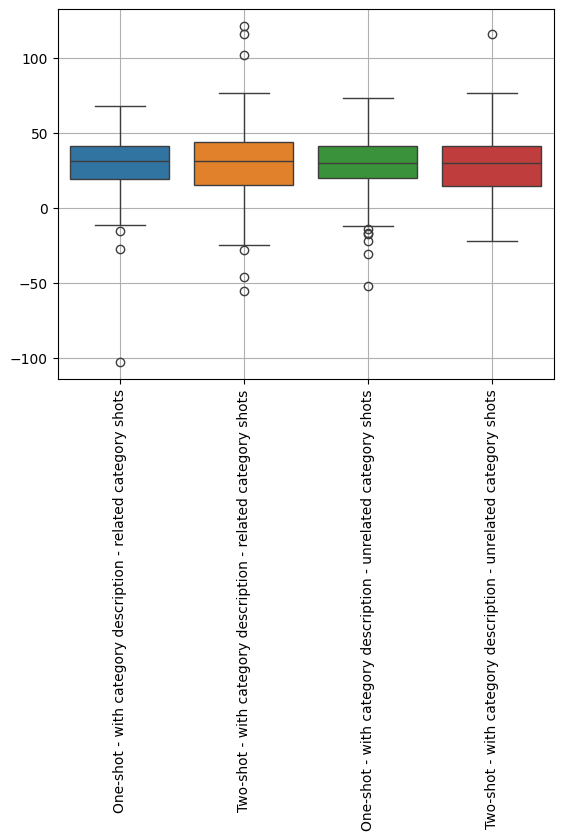

In [7]:
sns.boxplot(data=flesch)
plt.xticks(rotation=90)
plt.grid()

In [ ]:
print(pd.read_csv('./sample_same_category_shot_with_1.csv',sep = ";", encoding='utf-8-sig').pbs_cc_level1.value_counts())
print(pd.read_csv('./sample_same_category_shot_with_1.csv',sep = ";", encoding='utf-8-sig').pbs_cc_level2.value_counts())
print(pd.read_csv('./sample_same_category_shot_with_1.csv',sep = ";", encoding='utf-8-sig').pbs_cc_level3.value_counts())
print(pd.read_csv('./sample_same_category_shot_with_1.csv',sep = ";", encoding='utf-8-sig').pbs_cc_level4.value_counts())

In [8]:
cc = pd.DataFrame()
cc["with brand and manufacturer"] = {"level1":67,"level2":27,"level3":12,"level4":8}
cc["without brand and manufacturer"] = {"level1":68,"level2":25,"level3":20,"level4":12}

In [32]:
cc = pd.DataFrame()
cc["Zero-shot - with category description"] = {"level1":68,"level2":25,"level3":20,"level4":12}
cc["One-shot - with category description"] = {"level1":60,"level2":27,"level3":15,"level4":4}
cc["Two-shot - with category description"] = {"level1":67,"level2":30,"level3":12,"level4":4}
cc["Zero-shot - without category description"] = {"level1":72,"level2":30,"level3":16,"level4":12}
cc["One-shot - without category description"] = {"level1":60,"level2":22,"level3":10,"level4":4}
cc["Two-shot - without category description"] = {"level1":58,"level2":19,"level3":8,"level4":4}

In [10]:
cc = pd.DataFrame()
cc["One-shot - with category description - related category shots"] = {"level1":60,"level2":27,"level3":15,"level4":4}
cc["Two-shot - with category description - related category shots"] = {"level1":67,"level2":30,"level3":12,"level4":4}
cc["One-shot - with category description - unrelated category shots"] = {"level1":62,"level2":24,"level3":13,"level4":3}
cc["Two-shot - with category description - unrelated category shots"] = {"level1":62,"level2":25,"level3":12,"level4":3}

In [46]:
cc = pd.DataFrame()
cc["with prompt style"] = {"level1":64,"level2":28,"level3":16,"level4":10}
cc["without prompt style"] = {"level1":68,"level2":25,"level3":20,"level4":12}

In [49]:
cc = pd.DataFrame()
cc["Before post-processing"] = {"level1":72,"level2":46,"level3":28,"level4":16}
cc["After post-processing"] = {"level1":68,"level2":25,"level3":20,"level4":12}

In [64]:

cc = pd.DataFrame()
cc["Temperature = 0.5"] = {"level1":70,"level2":24,"level3":17,"level4":11}
cc["Temperature = 0.8"] = {"level1":68,"level2":25,"level3":20,"level4":12}
cc["Temperature = 1"] = {"level1":65,"level2":24,"level3":15,"level4":10}

In [11]:
cc

,One-shot - with category description - related category shots,Two-shot - with category description - related category shots,One-shot - with category description - unrelated category shots,Two-shot - with category description - unrelated category shots
level1,60,67,62,62
level2,27,30,24,25
level3,15,12,13,12
level4,4,4,3,3


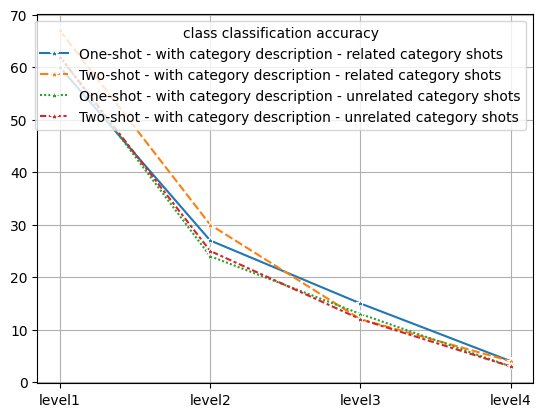

In [12]:
sns.lineplot(data = cc,marker='*')
plt.legend(title='class classification accuracy', loc='upper right')
plt.grid()

In [1]:
import pandas as pd
pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').bert_cc.describe()

count    100.000000
mean       0.267070
std        0.195774
min       -0.040359
25%        0.133474
50%        0.228167
75%        0.384180
max        0.918371
Name: bert_cc, dtype: float64

([0], [Text(0, 0, 'class classification with Bert')])

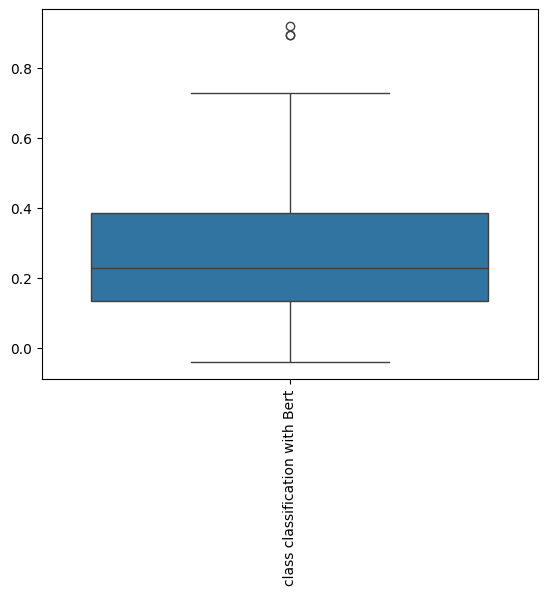

In [30]:
bert = pd.DataFrame()
bert["class classification with Bert"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').bert_cc
sns.boxplot(data=bert)
plt.xticks(rotation=90)

In [4]:
complex = pd.DataFrame()

In [2]:
pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig')

,Unnamed: 0,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,...,pbs_cc_level3,pbs_cc_level4,bert_cc,FleschReadingEase_description,complex_word_count_description,pbs_cc_level1_description,pbs_cc_level2_description,pbs_cc_level3_description,pbs_cc_level4_description,pbs_cc_description
0,0,2020178000,19140611,Farbband (Drucker),Farbbandkassette Gr.655 sw/rot PELIKAN H. 5797...,Farbbandkassette Gr.655 schwarz/rot Epson PE...,"Epson ERC 30/34/38 Universal, \nNylon, schwarz...",Farbband (Drucker) Gr. 655. Verwendung fr Dru...,579755,Pelikan Vertriebsgesellschaft mbH,...,False,False,0.107453,30.131828,52,False,False,False,False,24260604
1,1,2030939000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Resttonerbeh„lter TOSHIBA TB320,Resttonerbeh„lter TOSHIBA TB320,"passend fr Toshiba 1210, BD2810- Tonerbag TB-...",NaN,TB320,NaN,...,False,False,0.178098,-57.097000,55,False,False,False,False,24320706
2,2,2603884000,24290505,Hängeordner,"H„ngeordner A4, 80mm schwarz LEITZ 1821-00-00","H„ngeordner A4, 8cm schwarz LEITZ 1821-00-00",Fr geheftete Ablage von Sammelakten. Hartpapp...,"Leitz Qualit„ts-H„ngeordner 180ø, mit patentie...",1821-00-00,LEITZ ACCO BRANDS GMBH & CO. KG,...,False,False,0.086683,20.066158,60,True,False,False,False,24320706
3,3,1000041000,24241602,"CD-, DVD-, BD-Marker",Overheadstift 4ST WV sort. FABER CASTELL 151404 F,Overheadstift 4 Stck WV sortiert F FABER CA...,"Wasserl”sliche Folienstifte, ideal fr Overhea...",4er Etui MULTIMARK non-permanet F. Art der Sch...,151404,A.W. FABER-CASTELL GMBH & CO,...,False,False,-0.040359,37.470000,53,True,False,False,False,24220107
4,4,2014420000,19140611,Farbband (Drucker),Farbbandkassette Gr. 634 sw EPSON C13S015020 N...,Farbbandkassette Gr. 634 schwarz Nylon EPSON...,passend fr Epson MX100/105/1000/1050/1170/118...,NaN,C13S015020,Rauch Gerhard,...,True,True,0.028772,18.185000,51,False,False,False,False,24321106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2029079000,24300905,Magnetschild,Magnetstreifen C-Profile 10ST braun FRANKEN C1...,Magnetstreifen C-Profile 10 Stck braun 75x2...,Fenstermagnete geeignet fr Lagerbeschilderung...,Magnetschild. Beschriftungsschild auswechselba...,C163,LEITZ ACCO BRANDS GMBH & CO. KG,...,False,False,0.000000,13.797959,43,False,False,False,False,19100108
96,96,2030022000,19140601,"Toner, Tonereinheit (Laserdrucker, Kopierer)",Entwicklereinheit schwarz XEROX 005R90217,Entwicklereinheit schwarz XEROX 005R90217,passend fr Xerox 5750- Developer black 5R9021...,NaN,005R90217,NaN,...,False,False,0.494679,4.680164,50,False,False,False,False,24320706
97,97,2029277010,24300902,Magnet (Präsentation),Magnet 10ST grau FRANKEN HM10 12 D13 mm,Magnet 10 Stck grau D13 mm FRANKEN HM10 12,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,Signalmagnet. Sonderform: rund. Fr bis zu 1 B...,HM10 12,LEITZ ACCO BRANDS GMBH & CO. KG,...,False,False,0.177246,7.453415,58,True,True,True,True,24300902
98,98,1000213470,19140605,"Tintenkartusche, Druckkopf (Tintenstrahldrucker)",Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Inkjetpatrone PGI-7BK schwarz CANON 2444B001,Druckertyp: Canon Pixma MX 7600\nBezeichnung: ...,NaN,2444B001,UFP Austria GmbH,...,False,False,0.452209,27.711353,46,False,False,False,False,24241613


In [2]:
complex = pd.DataFrame()

In [11]:
complex["two-shot - without category description"] = pd.read_csv('./sample_without_2.csv',sep = ";", encoding='utf-8-sig').complex_word_count

In [3]:
complex["Zero-shot - with category description"] = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig').complex_word_count
complex["One-shot - with category description"] = pd.read_csv('./sample_with_1.csv',sep = ";", encoding='utf-8-sig').complex_word_count
complex["Two-shot - with category description"] = pd.read_csv('./sample_with_2.csv',sep = ";", encoding='utf-8-sig').complex_word_count
complex["Zero-shot - without category description"] = pd.read_csv('./sample_without_0.csv',sep = ";", encoding='utf-8-sig').complex_word_count
complex["One-shot - without category description"] = pd.read_csv('./sample_without_1.csv',sep = ";", encoding='utf-8-sig').complex_word_count
complex["Two-shot - without category description"] = pd.read_csv('./sample_without_2.csv',sep = ";", encoding='utf-8-sig').complex_word_count

In [4]:
complex

,Zero-shot - with category description,One-shot - with category description,Two-shot - with category description,Zero-shot - without category description,One-shot - without category description,Two-shot - without category description
0,15,22.0,24.0,19,23.0,28.0
1,22,25.0,23.0,24,17.0,13.0
2,18,24.0,19.0,27,19.0,24.0
3,27,24.0,17.0,24,21.0,18.0
4,24,21.0,3.0,20,18.0,20.0
...,...,...,...,...,...,...
95,25,8.0,21.0,23,18.0,4.0
96,4,23.0,21.0,16,21.0,36.0
97,19,21.0,23.0,23,21.0,3.0
98,23,24.0,22.0,3,21.0,18.0


In [5]:
normalized_df=(complex-complex.mean())/complex.std()

In [6]:
normalized_df

,Zero-shot - with category description,One-shot - with category description,Two-shot - with category description,Zero-shot - without category description,One-shot - without category description,Two-shot - without category description
0,-0.983819,0.217548,0.596188,-0.351956,0.289211,0.984515
1,0.137799,0.767141,0.446361,0.470371,-0.806747,-1.006639
2,-0.503126,0.583943,-0.152949,0.963768,-0.441428,0.453541
3,0.938954,0.583943,-0.452603,0.470371,-0.076108,-0.342921
4,0.458261,0.034350,-2.550186,-0.187491,-0.624087,-0.077434
...,...,...,...,...,...,...
95,0.618492,-2.347224,0.146706,0.305906,-0.624087,-2.201332
96,-2.746361,0.400746,0.146706,-0.845352,-0.076108,2.046464
97,-0.342895,0.034350,0.446361,0.305906,-0.076108,-2.334076
98,0.298030,0.583943,0.296533,-2.983403,-0.076108,-0.342921


In [7]:
normalized_df.describe()

,Zero-shot - with category description,One-shot - with category description,Two-shot - with category description,Zero-shot - without category description,One-shot - without category description,Two-shot - without category description
count,1.000000e+02,9.600000e+01,9.600000e+01,1.000000e+02,9.600000e+01,9.600000e+01
mean,-9.325873e-17,-4.625929e-18,1.595946e-16,-8.881784e-17,-1.942890e-16,1.619075e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.066823e+00,-3.446412e+00,-2.849841e+00,-3.312334e+00,-3.363982e+00,-2.599563e+00
25%,-3.428946e-01,-3.320463e-01,-4.526035e-01,-3.519561e-01,-4.414275e-01,-4.756647e-01
50%,-2.243235e-02,3.434962e-02,1.467060e-01,1.414403e-01,1.065515e-01,5.530985e-02
75%,4.582610e-01,4.465450e-01,5.961880e-01,4.703712e-01,4.718708e-01,7.190280e-01
max,4.784501e+00,3.148715e+00,3.592735e+00,2.608422e+00,3.394425e+00,4.170363e+00


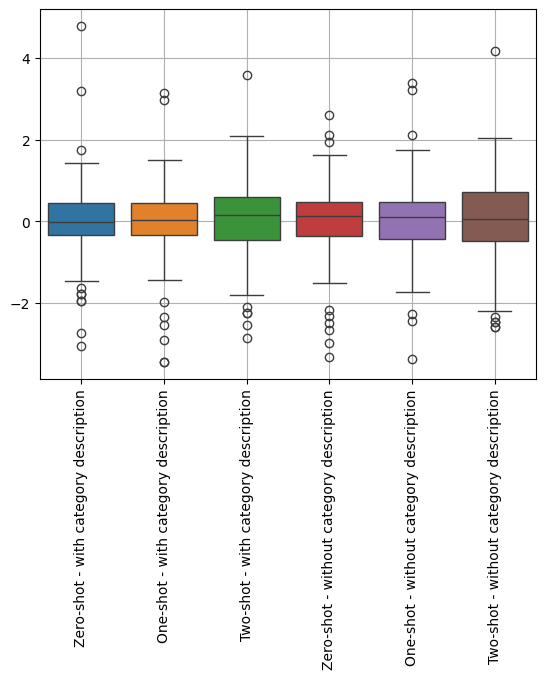

In [40]:
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)
plt.grid()

# coherence

In [8]:
text = "Der Toner wird in einem neuen und verbesserten Design geliefert - mit einer völlig anderen Form für einen besseren Halt am Druckkopf des Druckers (wie z B Canon Pixma MG5150). Außerdem wurde er so konzipiert,dass sich keine Luftblasen bilden. Das Ergebnis sind klarere Ausdrucke ohne Streifenbildung bei allen Farbaus"

In [9]:
p = """Sie erhalten eine für ein Produkt verfasste Produktbeschreibung.

Ihre Aufgabe ist es, die Produktbeschreibung anhand eines Kriteriums zu bewerten.

Bitte stellen Sie sicher, dass Sie diese Anweisungen sorgfältig lesen und verstehen. Halten Sie dieses Dokument offen, während Sie die Bewertung vornehmen, und konsultieren Sie es bei Bedarf.

Bewertungskriterien:

Kohärenz (1-5) - die Gesamtqualität aller Sätze. Wir orientieren uns bei dieser Dimension an der DUC-Qualitätsfrage nach Struktur und Kohärenz, wobei "die Produktbeschreibung gut strukturiert und gut organisiert sein sollte. Die Produktbeschreibung sollte nicht nur ein Haufen zusammenhängender Informationen sein, sondern von Satz zu einem kohärenten Informationskörper zu einem Thema aufbauen."

Bewertungsschritte:

Lesen Sie die Produktbeschreibung sorgfältig durch und identifizieren Sie die Produktkategorie und die wichtigsten Produktmerkmale.
Überprüfen Sie, ob die Produktbeschreibung diese in einer klaren und logischen Reihenfolge präsentiert.
Weisen Sie der Kohärenz auf einer Skala von 1 bis 5 einen Punktwert zu, wobei 1 das niedrigste und 5 das höchste ist, basierend auf den Bewertungskriterien.
Beispiel:

Produktbeschreibung:

"""+ text +"""

Bewertungsformular (nur Punktzahlen):

Kohärenz:"""

In [10]:
l = len(p)
output = pipe(p,max_new_tokens= 1,num_return_sequences= 1, do_sample = True,temperature = 0.8,repetition_penalty =4.0)[0]['generated_text']
output[output.index("Kohärenz:")+len("Kohärenz:"):]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


' 2'

In [9]:
import re
re.findall(r'\d+',output[output.index("Kohärenz:")+len("Kohärenz:"):])[0]

'3'

In [66]:
pd.read_csv('./sample_with_0.v2.csv',sep = ";", encoding='utf-8-sig').coherence.describe()

count    81.000000
mean      3.469136
std       0.726058
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: coherence, dtype: float64

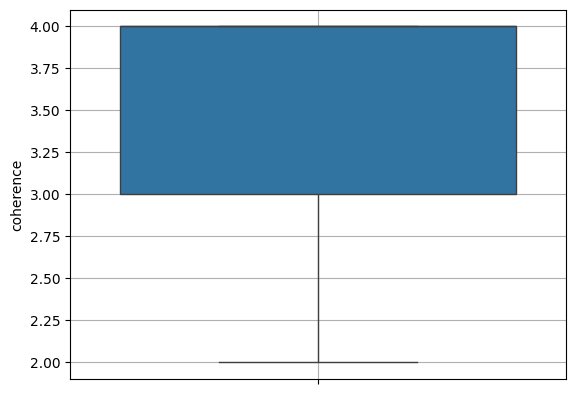

In [69]:
sns.boxplot(data=sample.coherence)
plt.xticks(rotation=90)
plt.grid()

In [67]:
sample = pd.read_csv('./sample_with_0.v2.csv',sep = ";", encoding='utf-8-sig')
sample.loc[sample.coherence == 4].loc[0].postprocessed

' "...die Beschreibung zu überprüfen..."Der Weg zum Ziel führt durch viele Kurven! Deshalb stehen bei mir neben einem fundierten Fachwissen auch Einfühlungsvermögen für meine PatientenInnen ganz oben auf meiner Prioritätenliste – denn nur so kann ich gemeinsam Ihre Wünsche verwirklichen… Und wenn es dann doch mal länger dauert … kein Problem - dafür gibt’s'

In [5]:
sample.loc[sample.coherence == 2].loc[10].postprocessed

' Das Gerät erzeugt keinen grünlichen Farbton und weist keine schädlichen Effekte für den menschlichen Körper aus (wie z. B.: Hautreizung, Augenschäden usw.). Der Grund dafür liegt in seiner einzigartigen Funktionsweise als kombinierte Lösung zur Entfernung aller Arten unerwünschter Flecken ohne Chemikalien zu verwendenCategory Archives for "Reise"'

In [ ]:
sample = pd.read_csv('./sample_with_0.csv',sep = ";", encoding='utf-8-sig')

In [ ]:
sample[(sample["bert_cc_class"] == sample["ECLASS_Name"])]

,Unnamed: 0,Konzernartikelnummer,ECLASS_8_1,ECLASS_Name,Bezeichnung,Webbezeichnung,Detailinformation ( the one online),LieferantenDetailinformation (the company),OEMNummer,Hersteller,...,pbs_cc_level4,bert_cc,FleschReadingEase_description,complex_word_count_description,pbs_cc_level1_description,pbs_cc_level2_description,pbs_cc_level3_description,pbs_cc_level4_description,pbs_cc_description,bert_cc_class


# Mistral

In [16]:
!pip install -q -U transformers peft accelerate optimum bitsandbytes

In [17]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, TextStreamer
model_name='jphme/em_german_mistral_v01'

In [ ]:
model=AutoModelForCausalLM.from_pretrained(model_name, low_cpu_mem_usage=True, load_in_8bit=True)
tokenizer=AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token_id=tokenizer.eos_token_id

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="jphme/em_german_mistral_v01")